In [1]:
# default package
import logging
import sys 
import os
import pathlib
import IPython
import random
from urllib.request import urlretrieve

In [2]:
# third party package
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from tqdm import tqdm
import seaborn as sns
# torch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:
# my package
sys.path.append(os.path.join(pathlib.Path().resolve(),"../src/p1ch10"))
sys.path.append(os.path.join(pathlib.Path().resolve(),"../src"))
from dsets import getCandidateInfoList, getCt, LunaDataset
from vis import findPositiveSamples, showCandidate

In [4]:
# reload settings
%load_ext autoreload
%autoreload 2

In [5]:
# logger
logger=logging.getLogger(__name__)
logging.basicConfig(level=logging.ERROR)

In [6]:
# graph setting
%matplotlib inline
sns.set()

In [7]:
# gpu
torch.cuda.is_available()

True

## dataset

In [8]:
candidateInfo_list = getCandidateInfoList(requireOnDisk_bool=True)
positiveInfo_list = [x for x in candidateInfo_list if x[0]]
diameter_list = [x[1] for x in positiveInfo_list]

In [9]:
print(len(candidateInfo_list))
print(len(positiveInfo_list))
print(positiveInfo_list[0])

56938
122
CandidateInfoTuple(isNodule_bool=True, diameter_mm=25.23320204, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.511347030803753100045216493273', center_xyz=(63.4740118048, 73.9174523314, -213.736128767))


In [10]:
for i in range(0, len(diameter_list), 100):
    print('{:4}  {:4.1f} mm'.format(i, diameter_list[i]))

   0  25.2 mm
 100   0.0 mm


In [11]:
for candidateInfo_tup in positiveInfo_list[:10]:
    print(candidateInfo_tup)
for candidateInfo_tup in positiveInfo_list[-10:]:
    print(candidateInfo_tup)
    
for candidateInfo_tup in positiveInfo_list:
    if candidateInfo_tup.series_uid.endswith('565'):
        print(candidateInfo_tup)

CandidateInfoTuple(isNodule_bool=True, diameter_mm=25.23320204, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.511347030803753100045216493273', center_xyz=(63.4740118048, 73.9174523314, -213.736128767))
CandidateInfoTuple(isNodule_bool=True, diameter_mm=21.58311204, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.905371958588660410240398317235', center_xyz=(109.142472723, 49.6356928166, -121.183579092))
CandidateInfoTuple(isNodule_bool=True, diameter_mm=19.65387738, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.752756872840730509471096155114', center_xyz=(56.1226132601, 67.868268695, -65.6269886453))
CandidateInfoTuple(isNodule_bool=True, diameter_mm=18.7832325, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.202811684116768680758082619196', center_xyz=(-82.79150362, -21.43587141, -97.18427459))
CandidateInfoTuple(isNodule_bool=True, diameter_mm=17.75323185, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.187451715205085403623595258748', center_xyz=(94.1132711884, -15.8936132585, -202.8472282

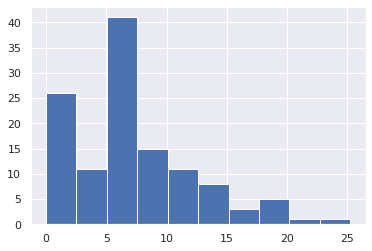

In [12]:
plt.hist(diameter_list);

In [13]:
positiveSample_list = findPositiveSamples()

2021-03-07 10:06:44,943 INFO     pid:6589 dsets:173:__init__ <dsets.LunaDataset object at 0x7f8ce4eca3a0>: 56938 training samples


0 CandidateInfoTuple(isNodule_bool=True, diameter_mm=4.09125367, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.295420274214095686326263147663', center_xyz=(-65.9640510945, 81.2984155672, -179.11789495))
1 CandidateInfoTuple(isNodule_bool=True, diameter_mm=12.02215382, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.430109407146633213496148200410', center_xyz=(-45.86281408, -106.11146345, -147.91194395))
2 CandidateInfoTuple(isNodule_bool=True, diameter_mm=6.13100107, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.832260670372728970918746541371', center_xyz=(-126.724423175, 80.9467845003, -221.131923212))
3 CandidateInfoTuple(isNodule_bool=True, diameter_mm=0.0, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.450501966058662668272378865145', center_xyz=(97.74, -33.97, 130.72))
4 CandidateInfoTuple(isNodule_bool=True, diameter_mm=7.053719722, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.134996872583497382954024478441', center_xyz=(-84.3086034783, -42.2047464888, -146.649587983))
5 CandidateI

2021-03-07 10:06:45,013 INFO     pid:6589 dsets:173:__init__ <dsets.LunaDataset object at 0x7f8ce4ea75e0>: 454 training samples


1.3.6.1.4.1.14519.5.2.1.6279.6001.249530219848512542668813996730 121 False [121, 178, 234]


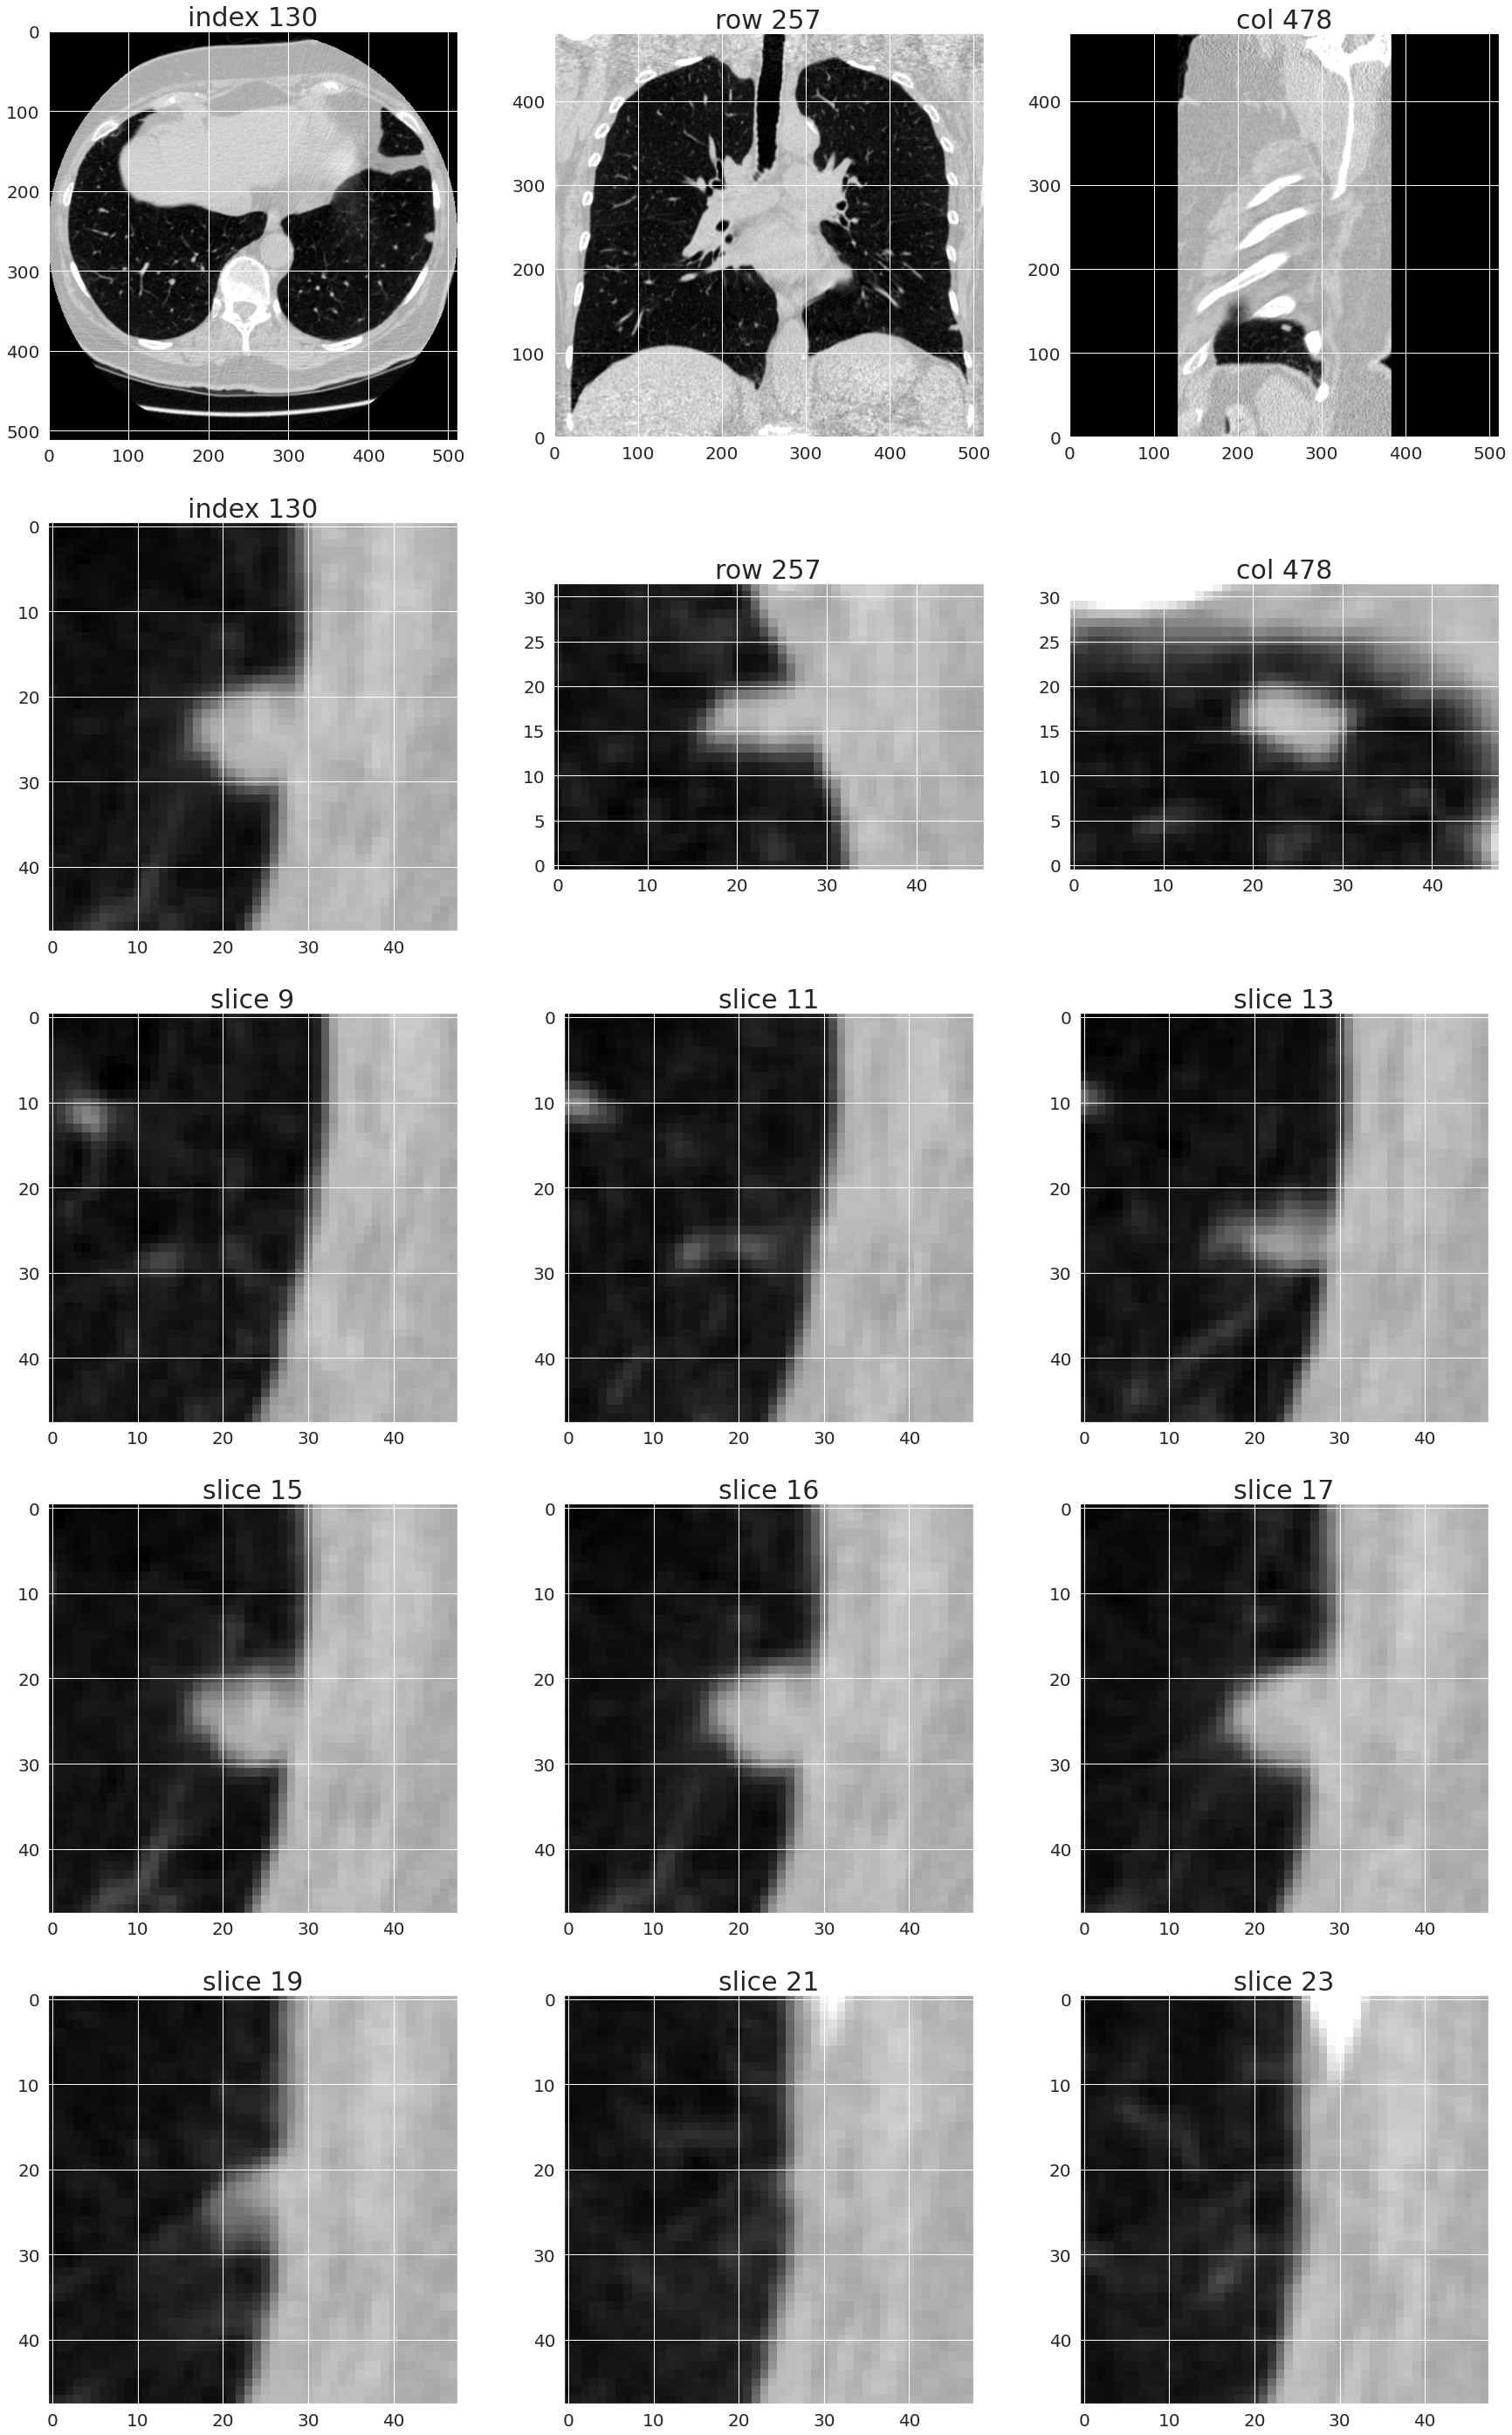

In [14]:
series_uid = positiveSample_list[11][2]
showCandidate(series_uid)

2021-03-07 10:06:48,583 INFO     pid:6589 dsets:173:__init__ <dsets.LunaDataset object at 0x7f8cce7a5c40>: 1061 training samples


1.3.6.1.4.1.14519.5.2.1.6279.6001.124154461048929153767743874565 570 False [570]


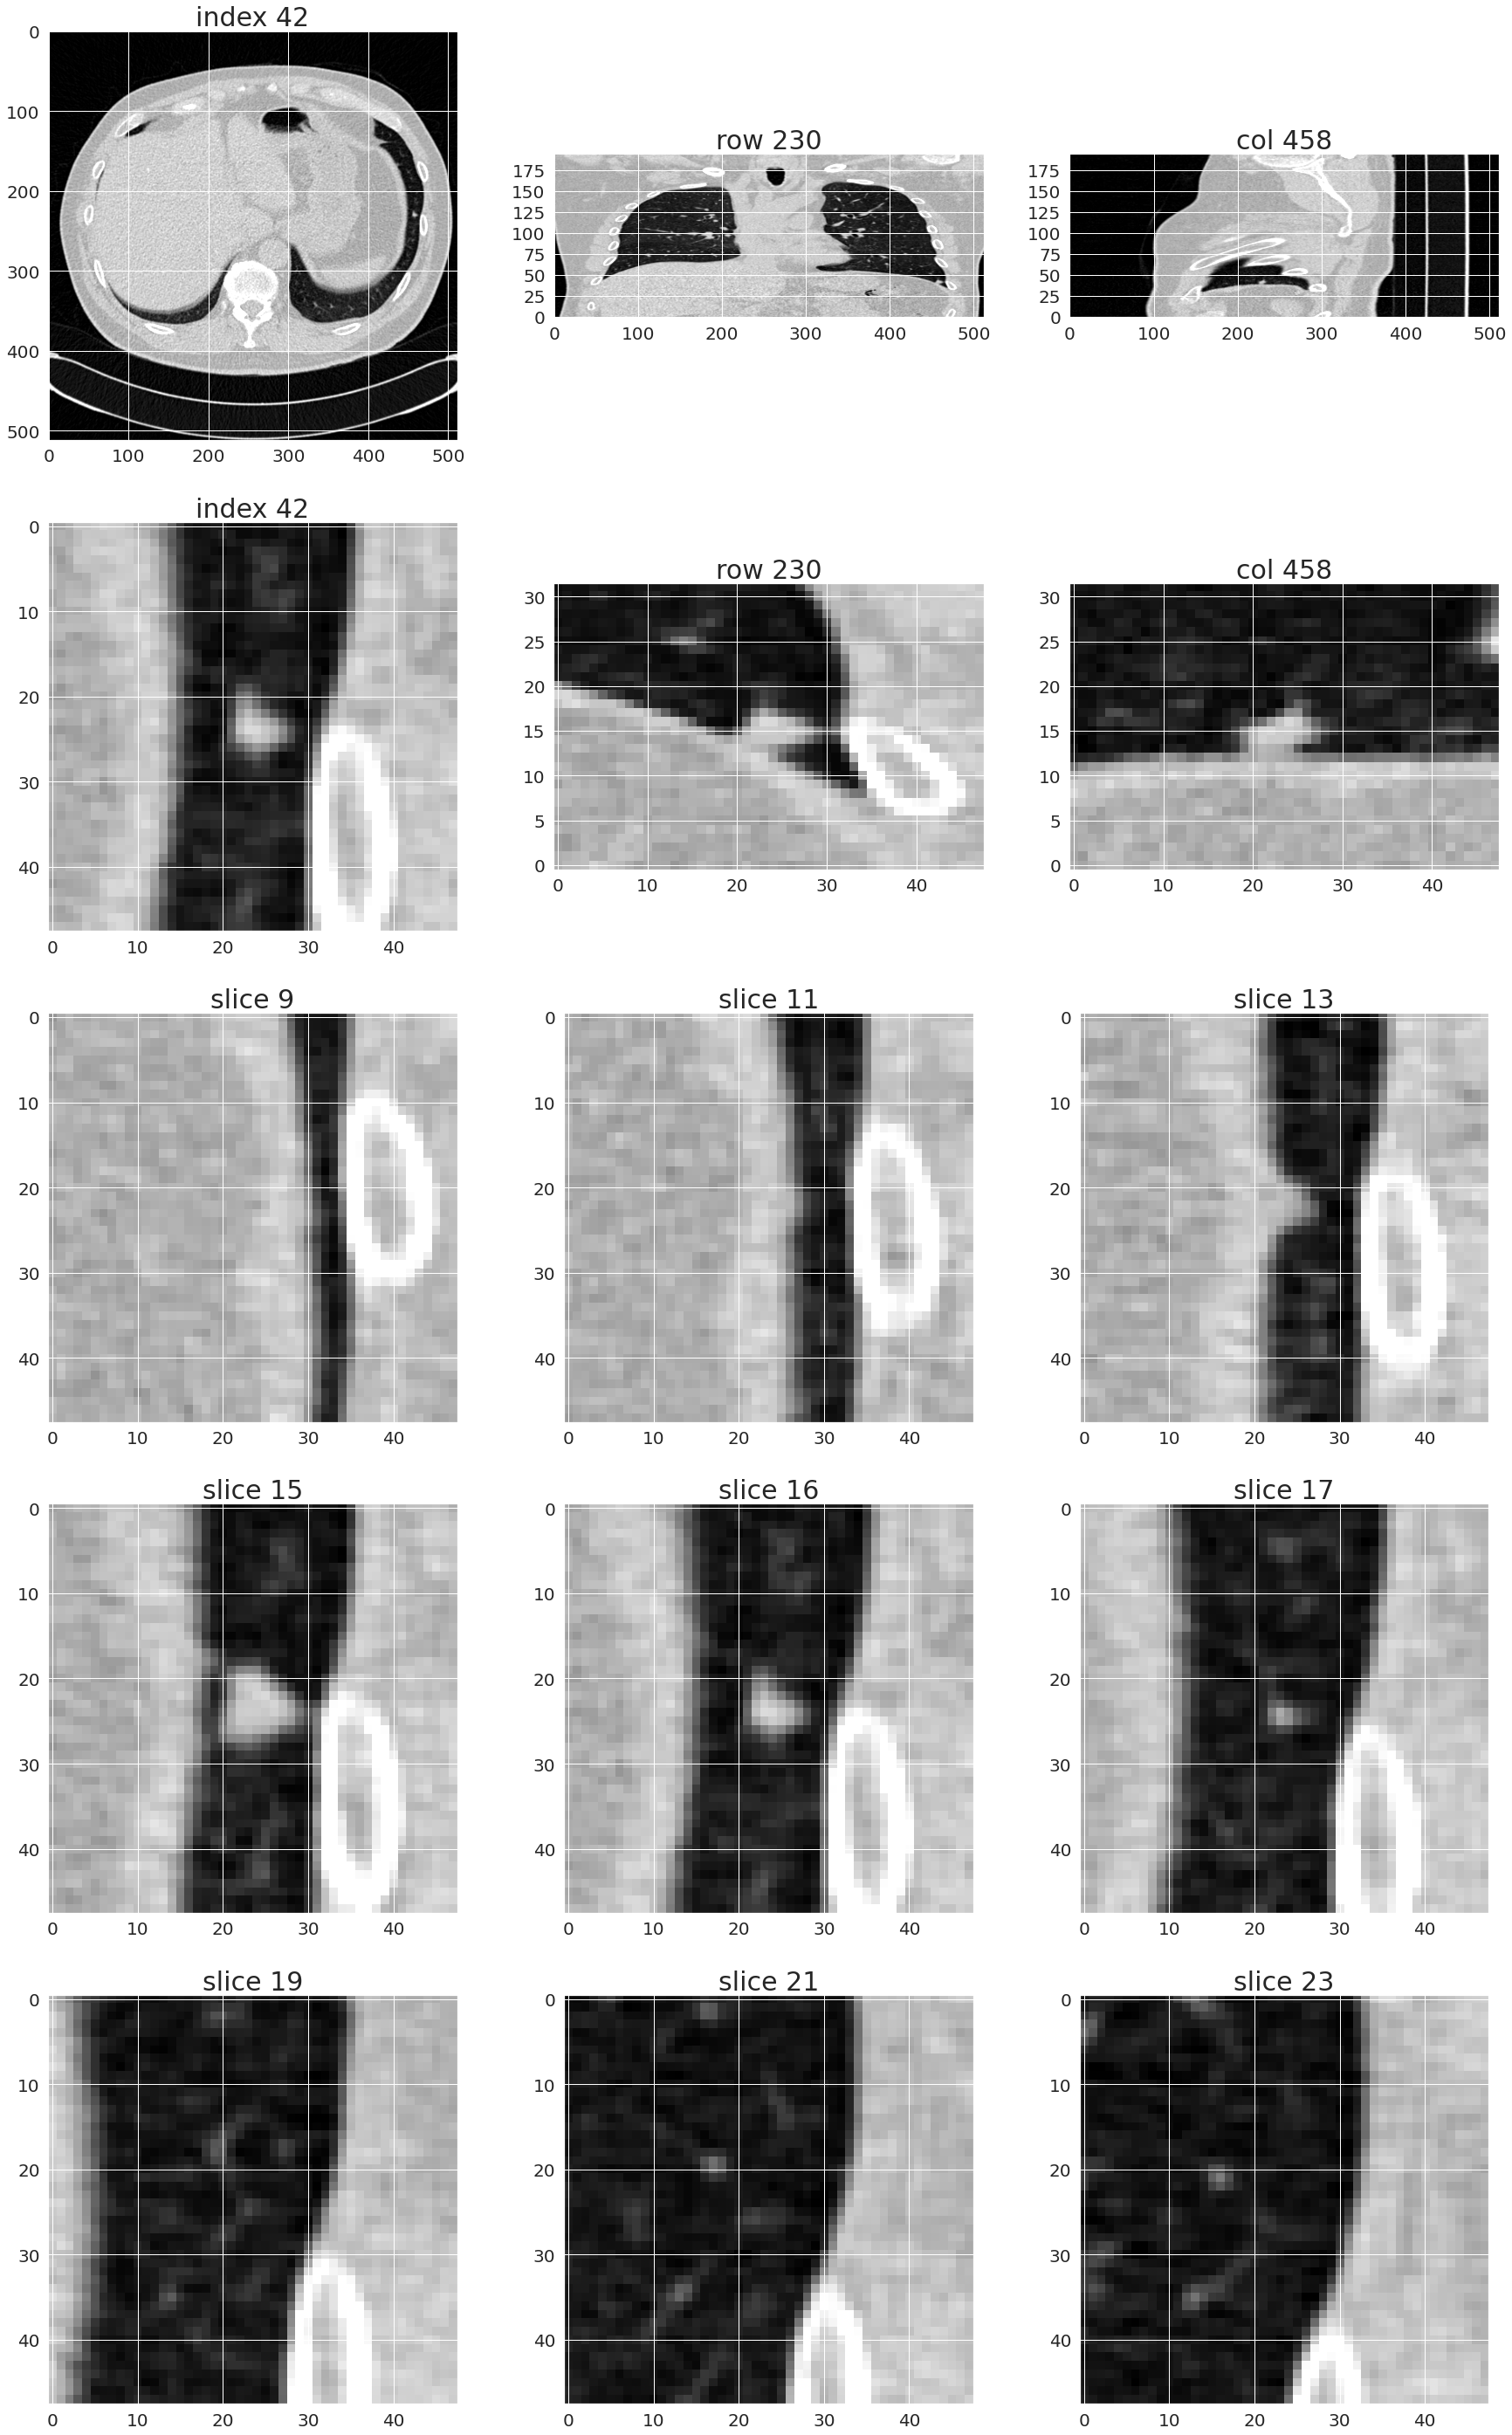

In [15]:
series_uid = '1.3.6.1.4.1.14519.5.2.1.6279.6001.124154461048929153767743874565'
showCandidate(series_uid)

2021-03-07 10:06:51,641 INFO     pid:6589 dsets:173:__init__ <dsets.LunaDataset object at 0x7f8cc8f5ca30>: 605 training samples


1.3.6.1.4.1.14519.5.2.1.6279.6001.126264578931778258890371755354 157 False [157]


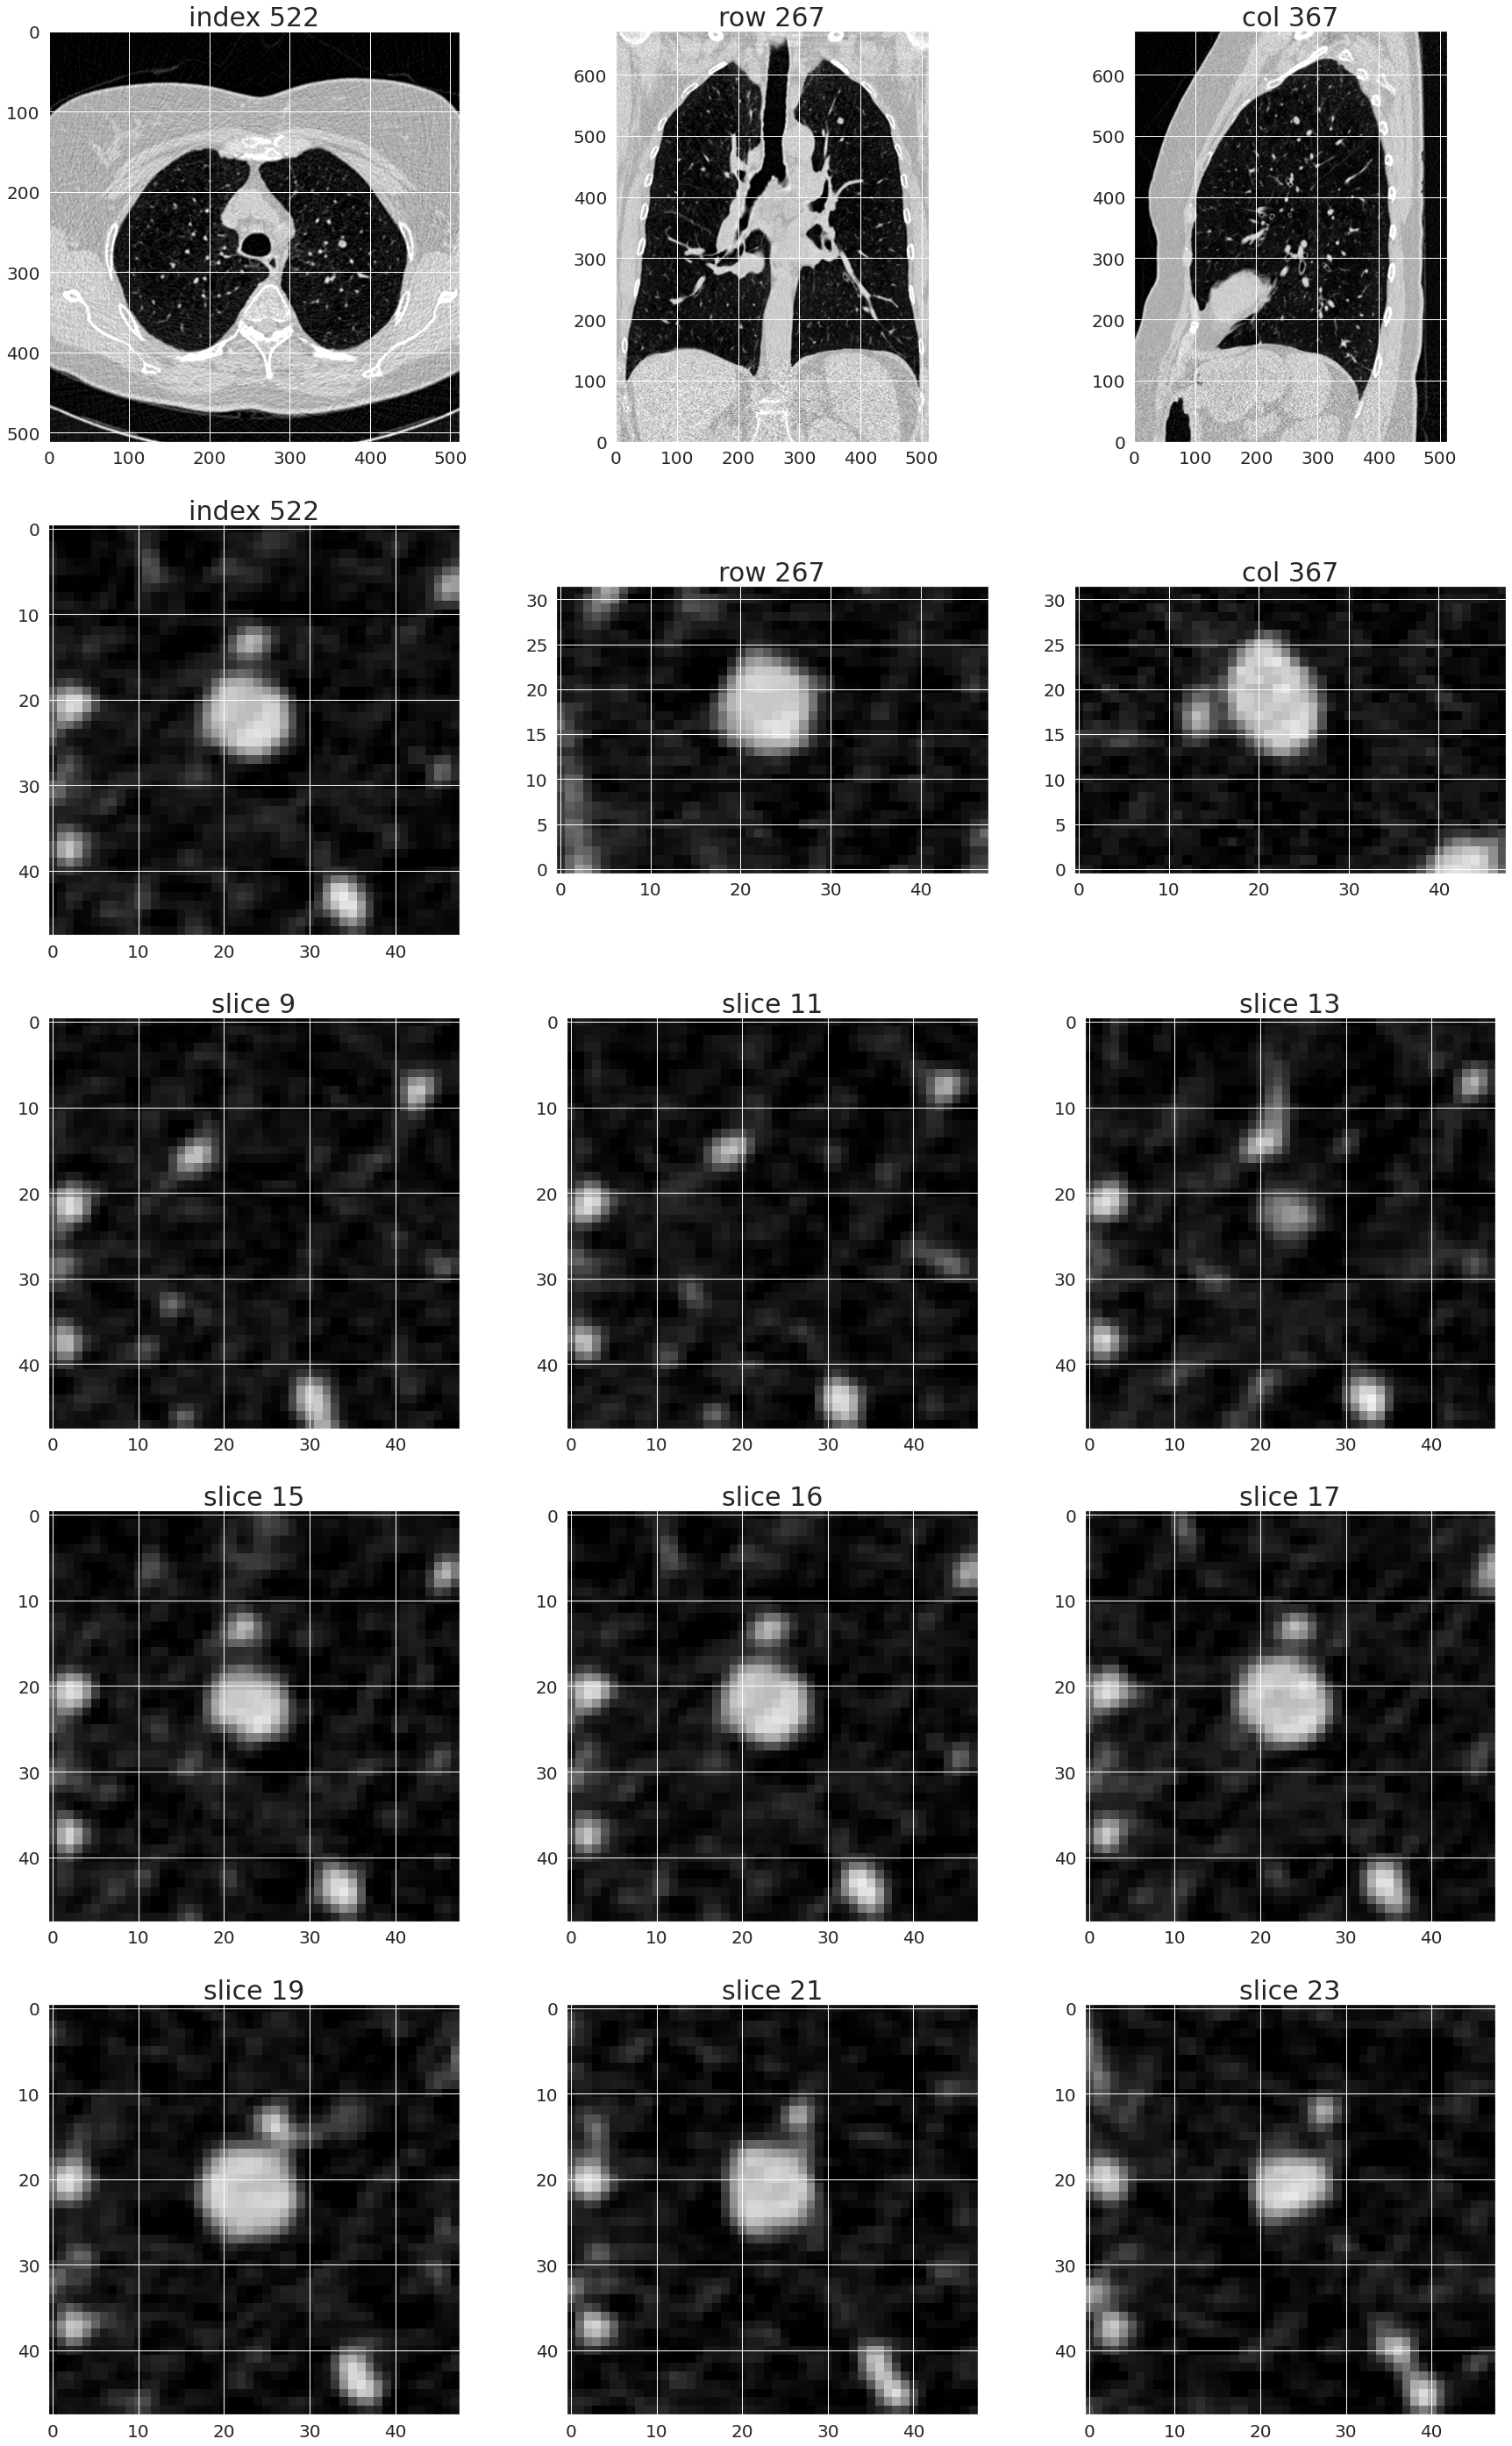

In [16]:
series_uid = '1.3.6.1.4.1.14519.5.2.1.6279.6001.126264578931778258890371755354'
showCandidate(series_uid)

In [17]:
LunaDataset()[0]

2021-03-07 10:06:56,088 INFO     pid:6589 dsets:173:__init__ <dsets.LunaDataset object at 0x7f8cce7a5ee0>: 56938 training samples


(tensor([[[[-858., -847., -865.,  ...,   13.,   14.,   14.],
           [-859., -878., -889.,  ...,   30.,   28.,   10.],
           [-882., -898., -897.,  ...,   51.,   52.,   40.],
           ...,
           [-765., -742., -818.,  ..., -792., -842., -853.],
           [-845., -816., -827.,  ..., -775., -879., -903.],
           [-872., -859., -841.,  ..., -690., -835., -877.]],
 
          [[-723., -703., -805.,  ...,   26.,   24.,   42.],
           [-712., -776., -856.,  ...,   22.,   42.,   28.],
           [-756., -843., -885.,  ...,   32.,   48.,   29.],
           ...,
           [-705., -652., -771.,  ..., -675., -802., -777.],
           [-758., -712., -774.,  ..., -589., -817., -838.],
           [-818., -826., -831.,  ..., -446., -762., -849.]],
 
          [[-830., -835., -863.,  ...,   18.,   32.,   46.],
           [-823., -855., -872.,  ...,   60.,   61.,   60.],
           [-834., -880., -897.,  ...,   58.,   57.,   57.],
           ...,
           [-818., -715., -714.

In [18]:
import numpy as np
import ipyvolume as ipv
V = np.zeros((128,128,128)) # our 3d array
# outer box
V[30:-30,30:-30,30:-30] = 0.75
V[35:-35,35:-35,35:-35] = 0.0
# inner box
V[50:-50,50:-50,50:-50] = 0.25
V[55:-55,55:-55,55:-55] = 0.0
ipv.quickvolshow(V, level=[0.25, 0.75], opacity=0.03, level_width=0.1, data_min=0, data_max=1)


/workspaces/load_to_goal/GitHub/pytorch-implementation/.venv/lib/python3.8/site-packages/ipyvolume/serialize.py:81: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqrt(gradient[0]**2 + gradient[1]**2 + gradient[2]**2)


In [19]:
ct = getCt(series_uid)
ipv.quickvolshow(ct.hu_a, level=[0.25, 0.5, 0.9], opacity=0.1, level_width=0.1, data_min=-1000, data_max=1000)

/workspaces/load_to_goal/GitHub/pytorch-implementation/.venv/lib/python3.8/site-packages/ipyvolume/widgets.py:179: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data_view = self.data_original[view]
/workspaces/load_to_goal/GitHub/pytorch-implementation/.venv/lib/python3.8/site-packages/ipyvolume/utils.py:204: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data = (data[slices1] + data[slices2])/2


# Note: the following visualization doesn't look very good.
It's only included here for completeness. 

In [20]:
import scipy.ndimage.morphology
def build2dLungMask(ct, mask_ndx, threshold_gcc = 0.7):
    dense_mask = ct.hu_a[mask_ndx] > threshold_gcc
    denoise_mask = scipy.ndimage.morphology.binary_closing(dense_mask, iterations=2)
    tissue_mask = scipy.ndimage.morphology.binary_opening(denoise_mask, iterations=10)
    body_mask = scipy.ndimage.morphology.binary_fill_holes(tissue_mask)
    air_mask = scipy.ndimage.morphology.binary_fill_holes(body_mask & ~tissue_mask)

    lung_mask = scipy.ndimage.morphology.binary_dilation(air_mask, iterations=2)

    return air_mask, lung_mask, dense_mask, denoise_mask, tissue_mask, body_mask


def build3dLungMask(ct):
    air_mask, lung_mask, dense_mask, denoise_mask, tissue_mask, body_mask = mask_list = \
        [np.zeros_like(ct.hu_a, dtype=np.bool) for _ in range(6)]

    for mask_ndx in range(ct.hu_a.shape[0]):
        for i, mask_ary in enumerate(build2dLungMask(ct, mask_ndx)):
            mask_list[i][mask_ndx] = mask_ary

    return air_mask, lung_mask, dense_mask, denoise_mask, tissue_mask, body_mask

In [22]:
from dsets import getCt
ct = getCt(series_uid)
air_mask, lung_mask, dense_mask, denoise_mask, tissue_mask, body_mask = build3dLungMask(ct)


In [23]:
bones = ct.hu_a * (ct.hu_a > 1.5)
lungs = ct.hu_a * air_mask
ipv.figure()
ipv.pylab.volshow(bones + lungs, level=[0.17, 0.17, 0.23], data_min=100, data_max=900)
ipv.show()